In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,7)

import warnings
warnings.filterwarnings('ignore')

import os

In [ ]:
data = pd.read_csv("cpcb_dly_aq_tamil_nadu-2014 (1).csv")
data.fillna(0, inplace = True)
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,0.0
1,38,01-07-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,0.0
2,38,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,0.0
3,38,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,0.0
4,38,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,0.0


In [ ]:
def calculate_si(SO2):
    si=0
    if (SO2<=40):
        si = SO2*(50/40)
    if (SO2>40 and SO2<=80):
        si = 50+(SO2-40)*(50/40)
    if (SO2>80 and SO2<=380):
        si = 100+(SO2-80)*(100/300)
    if (SO2>380 and SO2<=800):
        si = 200+(SO2-380)*(100/800)
    if (SO2>800 and SO2<=1600):
        si = 300+(SO2-800)*(100/800)
    if (SO2>1600):
        si = 400+(SO2-1600)*(100/800)
    return si
data['si']=data['SO2'].apply(calculate_si)
df=data[['SO2','si']]
df.head()

,SO2,si
0,11.0,13.75
1,13.0,16.25
2,12.0,15.00
3,15.0,18.75
4,13.0,16.25


In [ ]:
def calculate_ni(NO2):
    ni=0
    if (NO2<=40):
        ni = NO2*50/40
    elif (NO2>40 and NO2<=80):
        ni = 50+(NO2-14)*(50/40)
    elif (NO2>80 and NO2<=180):
        ni = 100+(NO2-80)*(100/100)
    elif (NO2>180 and NO2<=280):
        ni = 200+(NO2-180)*(100/100)
    elif (NO2>280 and NO2<=400):
        ni = 300+(NO2-800)*(100/120)
    else:
        ni = 400+(NO2-400)*(100/120)
    return ni
data['ni']=data['NO2'].apply(calculate_ni)
df=data[['NO2','ni']]
df.head()

,NO2,ni
0,17.0,21.25
1,17.0,21.25
2,18.0,22.50
3,16.0,20.00
4,14.0,17.50


In [ ]:
def calculate_aqi(si,ni):
    aqi=0
    if(si>ni):
        aqi=si
    if(ni>si):
        aqi=ni
    return aqi
data['AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni']),axis=1)
df=data[['Sampling Date', 'City/Town/Village/Area', 'si', 'ni', 'AQI']]
df.head()

,Sampling Date,City/Town/Village/Area,si,ni,AQI
0,01-02-14,Chennai,13.75,21.25,21.25
1,01-07-14,Chennai,16.25,21.25,21.25
2,21-01-14,Chennai,15.00,22.50,22.50
3,23-01-14,Chennai,18.75,20.00,20.00
4,28-01-14,Chennai,16.25,17.50,17.50


In [ ]:
def calculate_rspmi(rspm):
    rspmi=0
    if (rspm<=40):
        rspmi = rspm*50/40
    elif (rspm>40 and rspm<=80):
        rspmi = 50+(rspm-14)*(50/40)
    elif (rspm>80 and rspm<=180):
        rspmi = 100+(rspm-80)*(100/100)
    elif (rspm>180 and rspm<=280):
        rspmi = 200+(rspm-180)*(100/100)
    elif (rspm>280 and rspm<=400):
        rspmi = 300+(rspm-800)*(100/120)
    else:
        rspmi = 400+(rspm-400)*(100/120)
    return rspmi
data['rspmi']=data['RSPM/PM10'].apply(calculate_rspmi)
df=data[['RSPM/PM10','rspmi']]
df.head()

,RSPM/PM10,rspmi
0,55.0,101.25
1,45.0,88.75
2,50.0,95.00
3,46.0,90.00
4,42.0,85.00


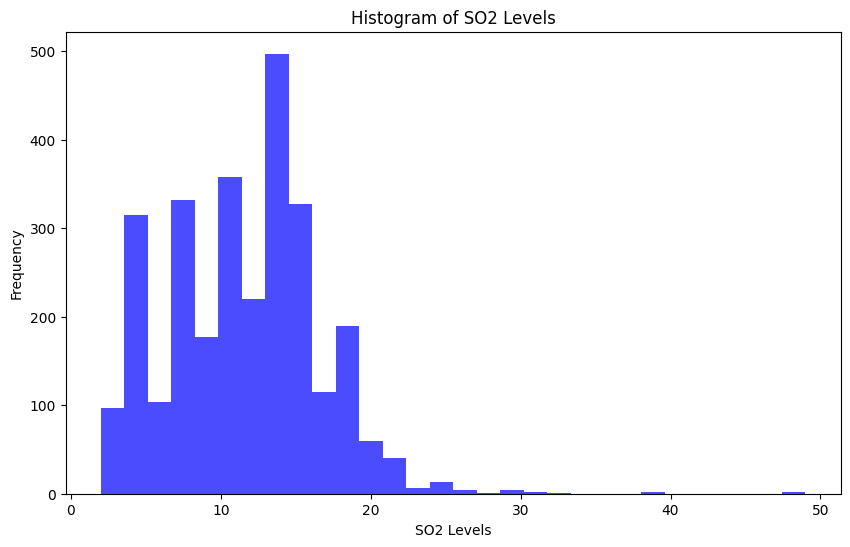

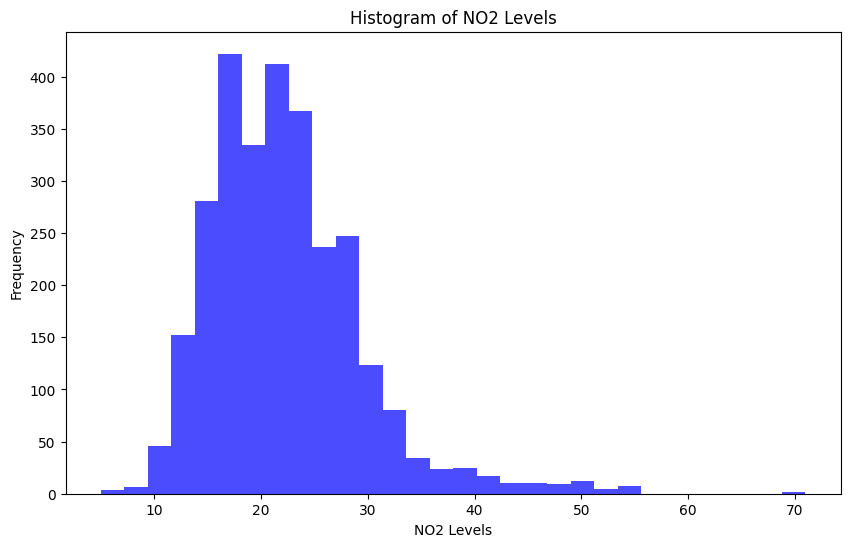

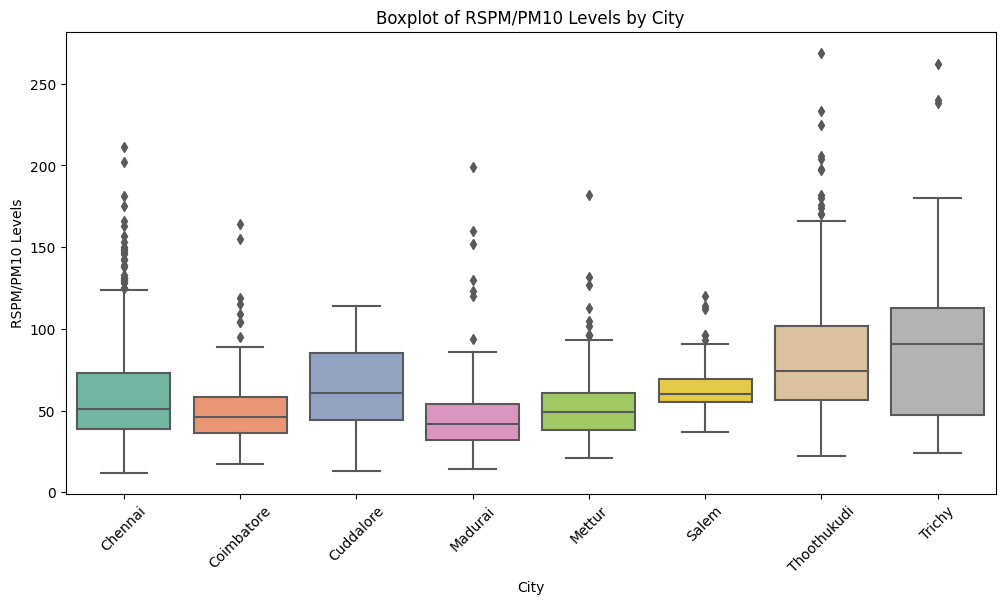

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"/content/cpcb_dly_aq_tamil_nadu-2014 (1).csv"
data = pd.read_csv(file_path)

# Data cleaning and preprocessing (if needed)
# Example: data = data.dropna()  # Remove rows with missing values

# Create visualizations

# Example 1: Histogram of SO2 levels
plt.figure(figsize=(10, 6))
plt.hist(data['SO2'], bins=30, color='blue', alpha=0.7)
plt.title("Histogram of SO2 Levels")
plt.xlabel("SO2 Levels")
plt.ylabel("Frequency")
plt.show()

# Example 2: Time series plot of NO2 levels
plt.figure(figsize=(10, 6))
plt.hist(data['NO2'], bins=30, color='blue', alpha=0.7)
plt.title("Histogram of NO2 Levels")
plt.xlabel("NO2 Levels")
plt.ylabel("Frequency")
plt.show()

# Example 3: Boxplot of RSPM/PM10 levels by City
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="City/Town/Village/Area", y="RSPM/PM10", palette="Set2")
plt.title("Boxplot of RSPM/PM10 Levels by City")
plt.xlabel("City")
plt.ylabel("RSPM/PM10 Levels")
plt.xticks(rotation=45)
plt.show()



